In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols,Symbol
from scipy.integrate import trapezoid, simpson, romberg, quad

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

#Integrales con trapezoid

In [3]:
def trapezoid_(f,a,b,tol,max_iter):
  '''
  entra:
  f= integrando
  a,b= limites integracion
  tol= error maximo de convergencia
  max_iter= cantidad max de ciclos

  devuelve:
  integral= el resultado
  i= iteraciones necesitadas
  '''
  n=2
  integral=0
  integral_new=0
  for i in range(max_iter): #i es el contador de iteraciones
    n*=(2*(i+1))
    x=np.linspace(a,b,n) #n es # de intervalos en trapezoid y eliminamos cos(pi/2)
    y=f(x)
    integral_new=trapezoid(y,x)
    if np.abs(integral_new-integral)<tol:
      return i, integral_new
    else:
      integral=integral_new

  raise ValueError('no converge')
  return i, integral


In [10]:
print(trapezoid_(f_1,1e-3,np.pi/2-(1e-3),1e-5,100))


(6, 2.158174838077447)


In [11]:
trapezoid_(f_2,1,100,1e-5,100)

(6, 0.018117091610849716)

In [16]:
def trapezoid_2(f,c,d,a,b,tol=1e-5,max_iter=100):
    x=sp.symbols('x')
    y=sp.symbols('y')

    integrando_ =sp.integrate(f,(y,c,d))

    f_n=sp.lambdify(x,integrando_,'numpy')

    n=2
    x_vals= np.linspace(a,b,n)
    y_vals=f_n(x_vals)
    integral=trapezoid(y_vals,x_vals)

    for i in range(max_iter):
        n *= 2 #el espaciado disminuye con cada iteracion
        x_vals =np.linspace(a,b,n)
        y_vals =f_n(x_vals)
        integral_new =trapezoid(y_vals, x_vals)

        if np.abs(integral_new - integral)< tol:
            return integral_new,i+1
        integral =integral_new

    return integral, max_iter

In [19]:
x, y = sp.symbols('x y')
f = 1 / sp.sqrt(1 - y**2)
resultado, iteraciones = trapezoid_2(f, 0, sp.sin(x), 0, np.pi/4)
print("Resultado:", resultado)
print("iteraciones:", iteraciones)


Resultado: 0.30842513753404244
iteraciones: 1


In [20]:
def simpson_(f,a,b,tol,max_iter):
  '''
  entra:
  f= integrando
  a,b= limites integracion
  tol= error maximo de convergencia
  max_iter= cantidad max de ciclos

  devuelve:
  integral= el resultado
  i= iteraciones necesitadas
  '''
  n=2
  integral=0
  integral_new=0
  for i in range(max_iter): #i es el contador de iteraciones
    n*=(2*(i+1))
    x=np.linspace(a,b,n) #n es # de intervalos en trapezoid y eliminamos cos(pi/2)
    y=f(x)
    integral_new=simpson(y,x)
    if np.abs(integral_new-integral)<tol:
      return i, integral_new
    else:
      integral=integral_new

  raise ValueError('no converge')
  return i, integral

In [21]:
print(simpson_(f_1,1e-3,np.pi/2-(1e-3),1e-5,100))

(5, 2.1581748361590263)


<ipython-input-20-a4b09819a55f>:20: DeprecationWarning: You are passing x=[1.00000000e-03 5.23932109e-01 1.04686422e+00 1.56979633e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_new=simpson(y,x)
<ipython-input-20-a4b09819a55f>:20: DeprecationWarning: You are passing x=[1.00000000e-03 1.05586422e-01 2.10172844e-01 3.14759265e-01
 4.19345687e-01 5.23932109e-01 6.28518531e-01 7.33104953e-01
 8.37691374e-01 9.42277796e-01 1.04686422e+00 1.15145064e+00
 1.25603706e+00 1.36062348e+00 1.46520991e+00 1.56979633e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_new=simpson(y,x)
<ipython-input-20-a4b09819a55f>:20: DeprecationWarning: You are passing x=[1.00000000e-03 1.75136455e-02 3.40272911e-02 5.05409366e-02
 6.70545822e-02 8.35682277e-02

In [ ]:
simpson_(f_2,1,60,1e-5,100) #para n>60 tiene un comportamiento es estacionario para una tolerancia de 1e-5

<ipython-input-35-2e8650a84b07>:20: DeprecationWarning: You are passing x=[ 1.         20.66666667 40.33333333 60.        ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_new=simpson(y,x)
<ipython-input-35-2e8650a84b07>:20: DeprecationWarning: You are passing x=[ 1.          4.93333333  8.86666667 12.8        16.73333333 20.66666667
 24.6        28.53333333 32.46666667 36.4        40.33333333 44.26666667
 48.2        52.13333333 56.06666667 60.        ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_new=simpson(y,x)
<ipython-input-35-2e8650a84b07>:20: DeprecationWarning: You are passing x=[ 1.          1.62105263  2.24210526  2.86315789  3.48421053  4.10526316
  4.72631579  5.34736842  5.96842105  6.58947368  7.21052632  7.83157895
  8.45

(5, 0.018116434740808537)

In [24]:
def simpson_2(f,c,d,a,b,tol=1e-5,max_iter=100):
    n =10
    x_sym, y_sym =sp.symbols('x y')

    #simbólica interna
    integral_sym =sp.integrate(f, (y_sym, c, d))
    f_n = sp.lambdify(x_sym, integral_sym, 'numpy')

    integral_prev = 0
    for i in range(max_iter):
        x_vals = np.linspace(a, b, n)
        y_vals = f_n(x_vals)
        integral_new = simps(y_vals, x_vals)

        if np.abs(integral_new - integral_prev) < tol:
            return i, integral_new

        integral_prev = integral_new
        n *= 2

    raise ValueError('No converge')


In [26]:
x, y = sp.symbols('x y')
f =1/sp.sqrt(1-y**2)
c =0
d =sp.sin(x)
a =0
b =sp.pi/4

#eval
iteraciones, resultado = simpson_2(f,c,d,a,b)
print(f"Resultado: {resultado}, iteraciones: {iteraciones}")


TypeError: Cannot interpret '0.25*pi' as a data type

#Integrales con quad

In [5]:
f_1=lambda x: 1/(np.sqrt(np.tan(x)))
Int_1=quad(f_1,0,np.pi/2)[0]

In [7]:
print(Int_1)

2.2214414690792026


In [6]:
f_2=lambda x: np.cos(x)/x**3
Int_2=quad(f_2,1,np.inf)[0]

<ipython-input-6-2a5799ec9952>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Int_2=quad(f_2,1,np.inf)[0]


In [8]:
print(Int_2)

0.01811792007976691


In [9]:
def integral_x(x):
  f_3=lambda y,x:1/(np.sqrt(1-y**2))
  Int_3=quad(f_3,0,np.sin(x),args=(x))[0]
  return Int_3

In [ ]:
Int_3f=quad(integral_x,0,np.pi/4)[0]

In [ ]:
print(Int_3f)

0.30842513753404244


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



<ipython-input-119-741447d5570a>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


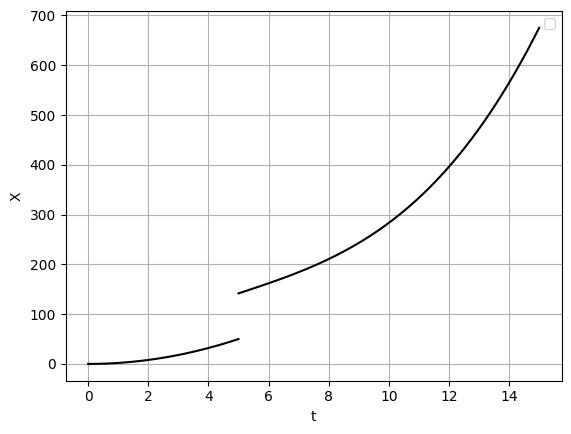

In [ ]:
t=sp.Symbol('t')
v_x1=4*t
v_x2=20+(5-t)**2

#integramos para obtener la distancia
x_1=sp.integrate(v_x1,t)
x_2=sp.integrate(v_x2,t)

#numericas
x_func1=sp.lambdify(t,x_1,'numpy')
x_func2=sp.lambdify(t,x_2,'numpy')
t_val1=np.linspace(0,5,25)
t_val2=np.linspace(5,15,50)

#evaluar las funciones en los valores de tiempo
x_val1 = x_func1(t_val1)
x_val2 = x_func2(t_val2)

#graficar
plt.plot(t_val1,x_val1,color='black')
plt.plot(t_val2,x_val2,color='black')

plt.xlabel("t")
plt.ylabel("X")
plt.legend()
plt.grid()

plt.show()

In [ ]:
#para hallar la fuerza encontramos distancia total y multiplicamos
v1=lambda t: 4*t
v2=lambda t:20+(5-t)**2
Int_1=quad(v1,0,5)[0]
Int_2=quad(v2,5,15)[0]
dist=Int_1+Int_2
w=200*dist

In [ ]:
w

116666.6666666667

#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


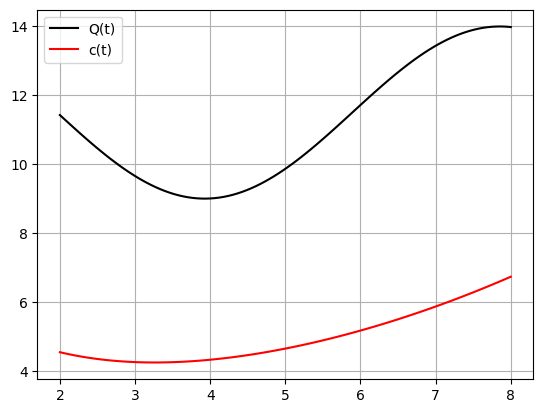

In [ ]:
#1
t=np.linspace(2,8,100)
q_f=lambda t:9+5*(np.cos(0.4*t))**2
c_f=lambda t:5*np.exp(-0.5*t)+2*np.exp(0.15*t)

#evaluamos
q_eval=q_f(t)
c_eval=c_f(t)

#graficar
plt.plot(t,q_eval,color='black',label='Q(t)')
plt.plot(t,c_eval,color='red',label='c(t)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#2
integrando=lambda t:q_f(t)*c_f(t)
M=romberg(integrando,2,8)
M

<ipython-input-123-b008c093e3ee>:3: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  M=romberg(integrando,2,8)


335.9625300616253

In [ ]:
#3
M_quad=quad(integrando,2,8)[0]
M_quad

335.9625300616257

#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
def periodo(fi,p0,k):
  integrando=lambda fi:1/(np.sqrt(1-k**2*np.sin(fi)**2))
  return 2*p0/np.pi*(quad(integrando,0,np.pi/2)[0])

In [ ]:
g=10
b=3
teta_i=0.5
teta_f=3
m=2


I0=(1/3)*m
fi=np.arcsin((np.sin(teta_f/2))/(np.sin(teta_i/2)))
k=np.sin(teta_i/2)
p0=2*np.pi*np.sqrt(I0/(m*g*b))
P=periodo(fi,p0,k)
P

<ipython-input-129-91c925902439>:9: RuntimeWarning: invalid value encountered in arcsin
  fi=np.arcsin((np.sin(teta_f/2))/(np.sin(teta_i/2)))


0.6728051090173067

#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
g=lambda t:22.8/(3.5+7*(t-1.25)**4)
g_h=lambda t:g(t)*60

autos_exact=quad(g_h,0,2)[0]

print(autos)
print(autos_exact)

599.5112609092068
599.5112609092054


In [ ]:
autos=simpson_(g_h,0,2,1e-5,100) [1]

<ipython-input-35-2e8650a84b07>:20: DeprecationWarning: You are passing x=[0.         0.66666667 1.33333333 2.        ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_new=simpson(y,x)
<ipython-input-35-2e8650a84b07>:20: DeprecationWarning: You are passing x=[0.         0.13333333 0.26666667 0.4        0.53333333 0.66666667
 0.8        0.93333333 1.06666667 1.2        1.33333333 1.46666667
 1.6        1.73333333 1.86666667 2.        ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_new=simpson(y,x)
<ipython-input-35-2e8650a84b07>:20: DeprecationWarning: You are passing x=[0.         0.02105263 0.04210526 0.06315789 0.08421053 0.10526316
 0.12631579 0.14736842 0.16842105 0.18947368 0.21052632 0.23157895
 0.25263158 0.27368421 0.29473684 0.31

In [ ]:
#calculamos el error porcentual
error_p=abs(autos-autos_exact)/autos_exact
print(error_p)

2.4652229019678704e-15


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
#definimos:
a=1
I=3
u=1

In [ ]:
def k_f2(a,r,teta):
    return (4*a*r*np.sin(teta))/(a**2+r**2+2*a*r*np.sin(teta))

In [ ]:
def K_int(k):
  integrand_k = lambda fi: 1/(np.sqrt(1-k**2*np.sin(fi)**2))
  return quad(integrand_k,0,np.pi/2)[0]

In [ ]:
def E_int(k):
    integrand_e = lambda fi: np.sqrt(1 - k**2 * np.sin(fi)**2)
    return quad(integrand_e, 0, np.pi/2)[0]

In [ ]:
def A(a,I,r,teta):
  #evaluamos las integrales
  k_new=k_f2(a,r,teta)
  k=np.sqrt(k_new)
  k_final=K_int(k)
  e_final=E_int(k)

  return (4*I*a)*((2-k**2)*k_final-2*e_final)/(k**2*(np.sqrt(a**2+r**2+2*a*r*np.sin(teta))))

<ipython-input-5-bf92c24e0a28>:8: RuntimeWarning: invalid value encountered in scalar divide
  return (4*I*a)*((2-k**2)*k_final-2*e_final)/(k**2*(np.sqrt(a**2+r**2+2*a*r*np.sin(teta))))


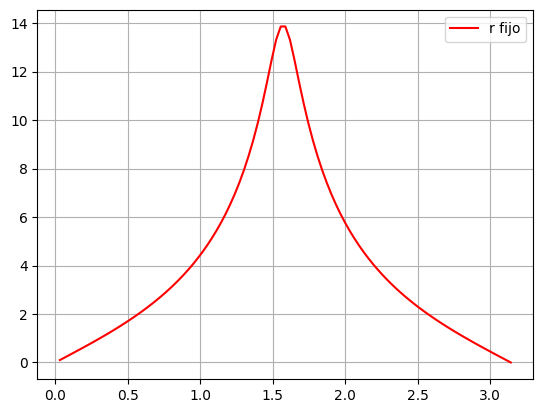

In [ ]:
#datos para evaluar r fijo

teta_valores=np.linspace(0,np.pi,100)
r=1.1

#debemos hacer un array evaluado para graficar A

A_vector1= [A(a,I,r,teta)  for teta in teta_valores]

plt.plot(teta_valores,A_vector1,color='red',label='r fijo')
plt.legend()
plt.grid()
plt.show()

<ipython-input-5-bf92c24e0a28>:8: RuntimeWarning: invalid value encountered in scalar divide
  return (4*I*a)*((2-k**2)*k_final-2*e_final)/(k**2*(np.sqrt(a**2+r**2+2*a*r*np.sin(teta))))


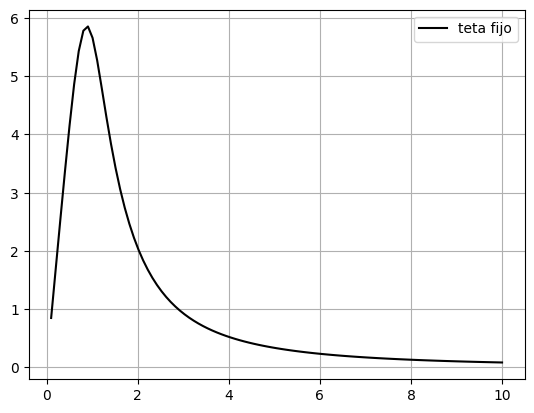

In [ ]:
#datos para evaluar teta fijo

r_valores=np.linspace(0,10,100)
teta_=1.1

#debemos hacer un array evaluado para graficar A

A_vector2= [A(a,I,r_val,teta_)  for r_val in r_valores]

plt.plot(r_valores,A_vector2,color='black',label='teta fijo')
plt.legend()
plt.grid()
plt.show()